<a href="https://colab.research.google.com/github/leehj112/2024_Accident_Project/blob/main/colab_5(LogisticRegression%2C%20SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
from sklearn import datasets
iris = datasets.load_iris()
print(list(iris.keys()))

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


In [44]:
x = iris['data'][:,3:] # 꽆잎의 너비 변수만 사용
iris['data'][:,3:].shape



(150, 1)

In [45]:
y = (iris['target'] == 2).astype('int') # index=2 : versicolor

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression() # 변수할당
log_reg.fit(x,y)


LogisticRegression()

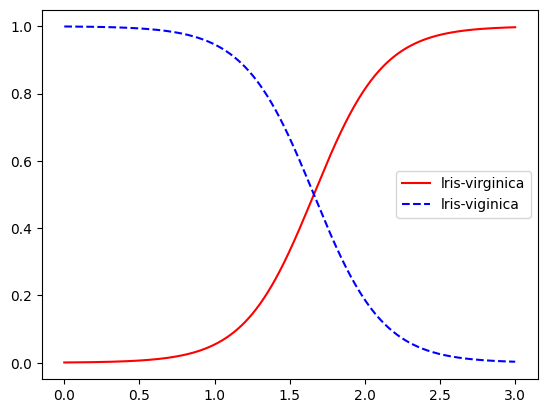

In [46]:
import numpy as np
import matplotlib.pyplot as plt

x_new = np.linspace(0,3, 1000).reshape(-1,1)
y_proba = log_reg.predict_proba(x_new)
plt.plot(x_new, y_proba[:,1], 'r-', label='lris-virginica')
plt.plot(x_new, y_proba[:,0], 'b--', label='lris-viginica')
plt.legend()
plt.show()


In [47]:
x = iris['data'][:,(2,3)] # 꽃잎의 길이, 너비 변수를 사용
y = iris['target'] # 3개 모든 클래스 사용

softmax_reg = LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10,random_state=2021)
softmax_reg.fit(x,y) # 모델학습


LogisticRegression(C=10, multi_class='multinomial', random_state=2021)

In [48]:
new_iris = [[5,2]] # 꽃잎 길이=5, 너비 변수=2
prediction = softmax_reg.predict(new_iris)[0]
label = iris['target_names'].tolist()
print(label[prediction])
# 예측된 클래스 레이블 출력

virginica


In [49]:
softmax_reg.predict_proba(new_iris) # 예측된값 출력

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [ ]:
#SVM

In [54]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
iris = datasets.load_iris()

iris = datasets.load_iris()
x = iris['data'][:,(2,3)]
y = (iris['target'] ==2).astype('int')

svm_clf = Pipeline([
    ('scaler',StandardScaler()),
    ('linear_svc',LinearSVC(C=1,loss='hinge'))
])

# 모델훈련
svm_clf.fit(x,y)
# 예측
new_iris = [[5.5,1.7]]
prediction = svm_clf.predict(new_iris)[0]
print(prediction)



1


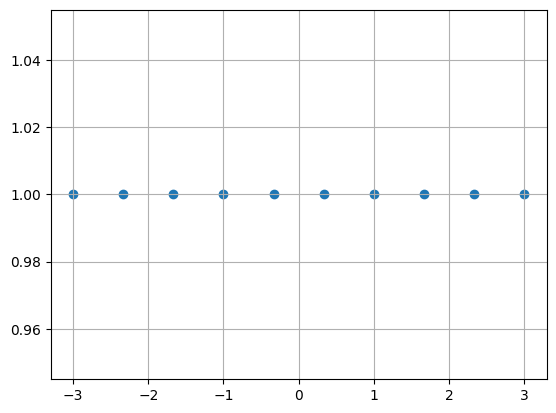

In [55]:
import matplotlib.pyplot as plt
x = np.linspace(-3,3,10)
y = np.linspace(1,1,10)
plt.scatter(x,y)
plt.grid()
plt.show()

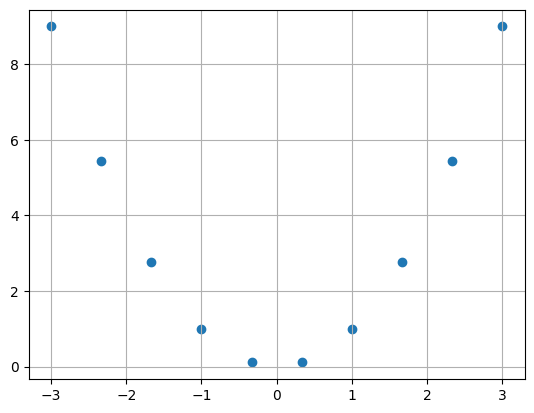

In [56]:
b_func = x**2
plt.scatter(x, b_func)
plt.grid()
plt.show()

In [62]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC

# 샘플 수 1000개, noise=0.1, randaom_state=2021
x,y = make_moons(n_samples=1000,noise=0.1,random_state=2021)

polynomial_std_svm = Pipeline([
    ("Polynomial",PolynomialFeatures(degree=3)),
    ('std',StandardScaler()),
    ('svm',LinearSVC(C=10,loss='hinge'))
])

polynomial_std_svm.fit(x,y)

new_moon = [[2.0,1.0]]
polynomial_std_svm.predict(new_moon)



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([1])